In [2]:
import os
import sys
proj_dir = os.path.split(os.getcwd())[0]
if proj_dir not in sys.path:
    sys.path.append(proj_dir)

In [3]:
# Import libs
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## Загрузка данных

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

## Метки классов

|Метка|Класс|
|:-----:|:-----|
|0|T-shirt (Футболка)|
|1|Trouser (Брюки)|
|2|Pullover (Свитер)|
|3|Dress (Платье)|
|4|Coat (Пальто)|
|5|Sandal (Сандали)|
|6|Shirt (Рубашка)|
|7|Sneaker (Кроссовки)|
|8|Bag (Сумка)|
|9|Ankle boot (Ботильоны)|

## Подготовка данных

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_imgs.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_imgs.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

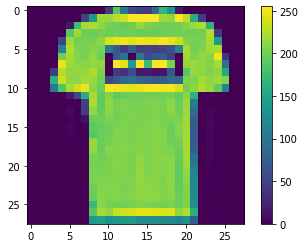

In [11]:
plt.imshow(train_imgs[1])
plt.colorbar()
plt.show()

In [12]:
#train_imgs = train_imgs.astype('float32')
#test_imgs = test_imgs.astype('float64')
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

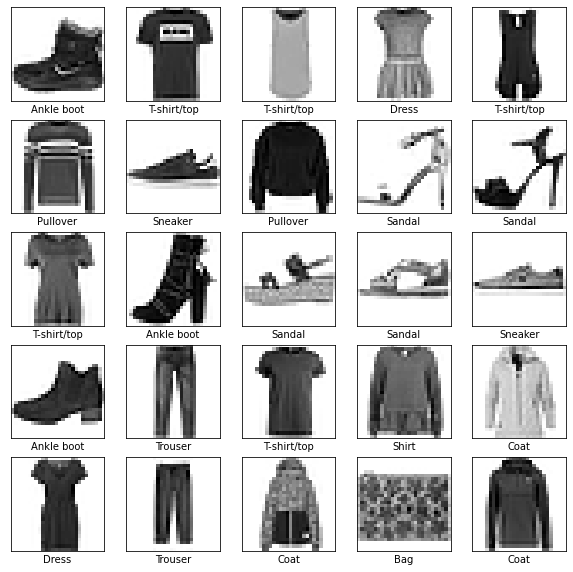

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# модели

In [18]:
from keras.callbacks import ModelCheckpoint

In [14]:
import src.models.model_arch as arch
import src.visualization.visualize as vis
import importlib

In [23]:
importlib.reload(arch)

<module 'src.models.model_arch' from '/Users/laptevartem/Repositories/fashionMNIST_experiments/src/models/model_arch.py'>

# Simple dense model

In [15]:
dense_model = arch.dense_model()
dense_model.compile(optimizer='Adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
dense_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_______________________________________________________

Epoch 1/20
193/193 [==============================] - 2s 9ms/step - loss: 1.0907 - accuracy: 0.6097 - val_loss: 0.5060 - val_accuracy: 0.8231
Epoch 2/20
193/193 [==============================] - 1s 6ms/step - loss: 0.5711 - accuracy: 0.7971 - val_loss: 0.4552 - val_accuracy: 0.8393
Epoch 3/20
193/193 [==============================] - 1s 6ms/step - loss: 0.5149 - accuracy: 0.8140 - val_loss: 0.4253 - val_accuracy: 0.8467
Epoch 4/20
193/193 [==============================] - 1s 6ms/step - loss: 0.4708 - accuracy: 0.8325 - val_loss: 0.4076 - val_accuracy: 0.8534
Epoch 5/20
193/193 [==============================] - 1s 6ms/step - loss: 0.4520 - accuracy: 0.8383 - val_loss: 0.3915 - val_accuracy: 0.8608
Epoch 6/20
193/193 [==============================] - 1s 6ms/step - loss: 0.4467 - accuracy: 0.8388 - val_loss: 0.3817 - val_accuracy: 0.8622
Epoch 7/20
193/193 [==============================] - 1s 6ms/step - loss: 0.4276 - accuracy: 0.8437 - val_loss: 0.3663 - val_accuracy: 0.8703
Epoch 

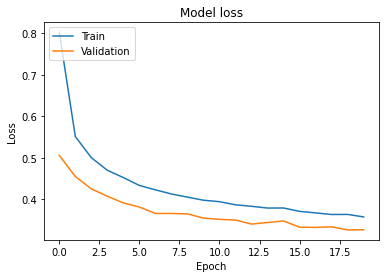

CPU times: user 46.4 s, sys: 3.86 s, total: 50.3 s
Wall time: 24.6 s


In [15]:
%%time
history_dense = dense_model.fit(train_imgs.reshape(60000, 28, 28, 1),
                    train_labels,
                    epochs=20, validation_split=0.18, batch_size=256)

vis.plot_loss_graph(history_dense)

In [16]:
#dense_model.save("../models/dense_arch_model.h5")
dense_model = keras.models.load_model("../models/dense_arch_model.h5")

# Convolutional Model

In [ ]:
importlib.reload(arch)

In [17]:
conv_model = arch.conv_model()
conv_model.compile(optimizer='Adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation (Activation)      (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 64)        256 

Epoch 1/20
193/193 [==============================] - 33s 168ms/step - loss: 0.2092 - accuracy: 0.9215 - val_loss: 0.2320 - val_accuracy: 0.9216
Epoch 2/20
193/193 [==============================] - 33s 172ms/step - loss: 0.2061 - accuracy: 0.9232 - val_loss: 0.2285 - val_accuracy: 0.9196
Epoch 3/20
193/193 [==============================] - 34s 177ms/step - loss: 0.2075 - accuracy: 0.9230 - val_loss: 0.2348 - val_accuracy: 0.9213
Epoch 4/20
193/193 [==============================] - 33s 172ms/step - loss: 0.2039 - accuracy: 0.9235 - val_loss: 0.2483 - val_accuracy: 0.9174
Epoch 5/20
193/193 [==============================] - 33s 171ms/step - loss: 0.2054 - accuracy: 0.9223 - val_loss: 0.2318 - val_accuracy: 0.9202
Epoch 6/20
193/193 [==============================] - 33s 172ms/step - loss: 0.1993 - accuracy: 0.9254 - val_loss: 0.2326 - val_accuracy: 0.9213
Epoch 7/20
193/193 [==============================] - 33s 173ms/step - loss: 0.2040 - accuracy: 0.9249 - val_loss: 0.2338 - val_ac

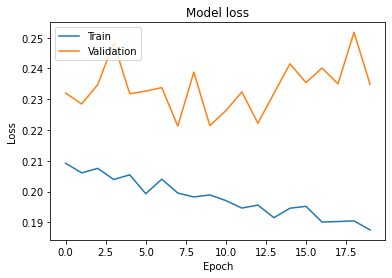

CPU times: user 29min 13s, sys: 6min 15s, total: 35min 28s
Wall time: 11min 13s


In [71]:
%%time
cb = ModelCheckpoint(filepath="../models/conv_arch_model.h5",
                     monitor='val_loss',
                     save_best_only=True)

history_conv = conv_model.fit(train_imgs.reshape(60000, 28, 28, 1),
                              train_labels,
                              epochs=20,
                              validation_split=0.18,
                              batch_size=256, callbacks=cb)

vis.plot_loss_graph(history_conv)

In [72]:
#conv_model.save("../models/conv_arch_model.h5")
conv_model = keras.models.load_model("../models/conv_arch_model.h5")

# Model with SeparableConv Layers

In [24]:
sep_model = arch.separableconv_model()
sep_model.compile(optimizer='Adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
sep_model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 11, 11, 64)        2400      
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256 

Epoch 1/20
193/193 [==============================] - 31s 158ms/step - loss: 1.2687 - accuracy: 0.5422 - val_loss: 1.2344 - val_accuracy: 0.7260
Epoch 2/20
193/193 [==============================] - 31s 159ms/step - loss: 0.5991 - accuracy: 0.7698 - val_loss: 0.6028 - val_accuracy: 0.8208
Epoch 3/20
193/193 [==============================] - 36s 188ms/step - loss: 0.5191 - accuracy: 0.8049 - val_loss: 0.4266 - val_accuracy: 0.8422
Epoch 4/20
193/193 [==============================] - 34s 175ms/step - loss: 0.4650 - accuracy: 0.8258 - val_loss: 0.3785 - val_accuracy: 0.8535
Epoch 5/20
193/193 [==============================] - 33s 173ms/step - loss: 0.4380 - accuracy: 0.8364 - val_loss: 0.3490 - val_accuracy: 0.8679
Epoch 6/20
193/193 [==============================] - 32s 167ms/step - loss: 0.4157 - accuracy: 0.8447 - val_loss: 0.3360 - val_accuracy: 0.8720
Epoch 7/20
193/193 [==============================] - 33s 171ms/step - loss: 0.4011 - accuracy: 0.8507 - val_loss: 0.3243 - val_ac

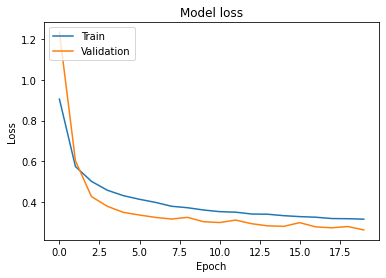

CPU times: user 22min 38s, sys: 5min 18s, total: 27min 56s
Wall time: 10min 50s


In [25]:
%%time
cb = ModelCheckpoint(filepath="../models/sep_arch_model.h5",
                     monitor='val_loss',
                     save_best_only=True)

history_sep = sep_model.fit(train_imgs.reshape(60000, 28, 28, 1),
                              train_labels,
                              epochs=20,
                              validation_split=0.18,
                              batch_size=256, callbacks=cb)

vis.plot_loss_graph(history_sep)


In [26]:
sep_model = keras.models.load_model("../models/sep_arch_model.h5")

# Metrics comparison

In [27]:
test_loss, test_acc = dense_model.evaluate(test_imgs.reshape(10000, 28, 28, 1), test_labels)
print('Test accuracy:', test_acc)
#print('Test loss:', test_loss)

313/313 [==============================] - 1s 1ms/step - loss: 0.3525 - accuracy: 0.8734
Test accuracy: 0.8733999729156494


In [73]:
test_loss, test_acc = conv_model.evaluate(test_imgs.reshape(10000, 28, 28, 1), test_labels)
print('Test accuracy:', test_acc)
#print('Test loss:', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.2323 - accuracy: 0.9183
Test accuracy: 0.9182999730110168


In [29]:
test_loss, test_acc = sep_model.evaluate(test_imgs.reshape(10000, 28, 28, 1), test_labels)
print('Test accuracy:', test_acc)
#print('Test loss:', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.2746 - accuracy: 0.8997
Test accuracy: 0.8996999859809875


# Let's look at predictions

In [41]:
predictions = model.predict(test_imgs.reshape(10000, 28, 28, 1))

In [42]:
predictions[0]

array([6.9732300e-07, 6.1908381e-09, 1.0515065e-06, 6.6235359e-08,
       5.1159901e-07, 1.5725325e-03, 1.7323255e-06, 1.8438907e-02,
       2.1110789e-05, 9.7996336e-01], dtype=float32)

In [43]:
np.argmax(predictions[0])

9

In [44]:
test_labels[0]

9

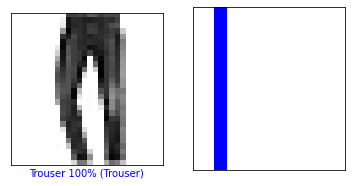

In [46]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
vis.plot_image(predictions[i], test_labels[i], test_imgs[i], class_names)
plt.subplot(1,2,2)
vis.plot_value_array(predictions[i],  test_labels[i])
plt.show()

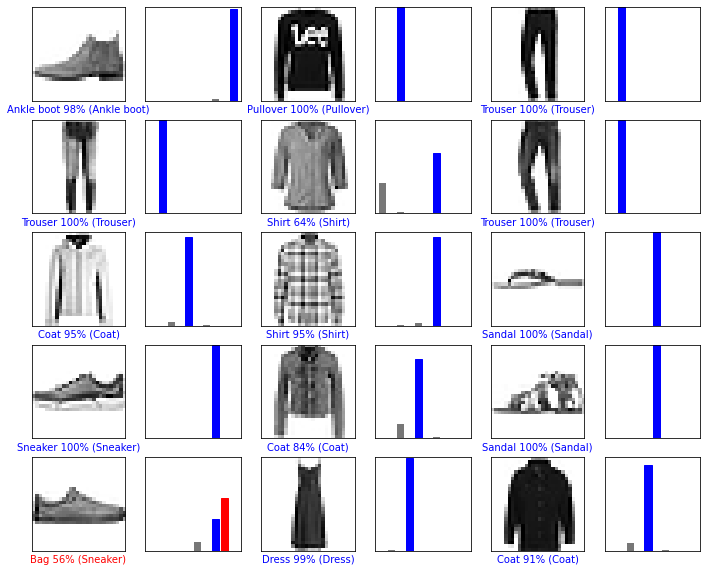

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    vis.plot_image(predictions[i], test_labels[i], test_imgs[i], class_names)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    vis.plot_value_array(predictions[i], test_labels[i])
plt.show()

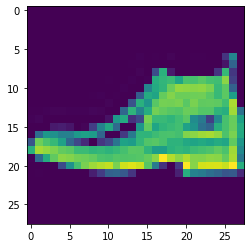

In [21]:
img = test_imgs[4567]
plt.imshow(img)
plt.show()

Модели tf.keras оптимизированы для того, чтобы делать прогнозы на пакеты (batch) или коллекции (collection). Поэтому, хотя мы используем одно изображение, нам нужно добавить его в список:

In [22]:
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [50]:
single_prediction = model.predict(img.reshape(1, 28, 28, 1))
single_prediction

array([[6.48145565e-11, 1.19262803e-12, 8.37025893e-10, 8.43606088e-12,
        2.40756498e-10, 4.74842227e-06, 6.84535428e-10, 1.18876305e-04,
        1.40397094e-06, 9.99874949e-01]], dtype=float32)

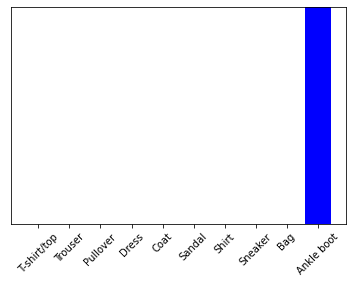

In [51]:
vis.plot_value_array(single_prediction.flatten(), test_labels[4567])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [20]:
model = keras.applications.Xception()

91889664/91884032 [==============================] - 32s 0us/step


In [21]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

# logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing as sk_pre

In [39]:
from joblib import dump, load

In [34]:
clf_train = (train_imgs).reshape((60000, 28*28))
clf_test = (test_imgs).reshape((10000, 28*28))

In [75]:
#scaler = sk_pre.StandardScaler().fit(clf_train)

#clf_train_scaled = scaler.transform(clf_train)
#clf_test_scaled = scaler.transform(clf_test)

In [35]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import chi2

In [114]:
#selector = VarianceThreshold(0.1)

In [115]:
#clf_train_selected = selector.fit_transform(clf_train, train_labels)

In [116]:
#clf_train_selected.shape

(60000, 402)

In [117]:
#clf_test_selected = selector.transform(clf_test)

In [37]:
clf = LogisticRegression(solver='lbfgs',
                         max_iter=100,
                         multi_class='auto')

In [38]:
%%time
clf.fit(clf_train, train_labels)

CPU times: user 54.2 s, sys: 993 ms, total: 55.1 s
Wall time: 29.3 s


/Users/laptevartem/Repositories/fashionMNIST_experiments/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#dump(clf, "../models/logit_model.joblib")
#clf = load("../models/logit_model.joblib")

['../models/logit_model.joblib']

In [41]:
clf.score(clf_test, test_labels)

0.8439

In [42]:
clf.score(clf_train, train_labels)

0.86625

# SVM

In [43]:
from sklearn.svm import LinearSVC

In [44]:
clf2 = LinearSVC()

In [45]:
%%time
clf2.fit(clf_train, train_labels)

CPU times: user 4min 15s, sys: 1.3 s, total: 4min 16s
Wall time: 4min 22s


/Users/laptevartem/Repositories/fashionMNIST_experiments/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [47]:
dump(clf2, "../models/svm_model.joblib")
#clf2 = load("../models/svm_model.joblib")

['../models/svm_model.joblib']

In [48]:
clf2.score(clf_test, test_labels)

0.8394

In [49]:
clf2.score(clf_train, train_labels)

0.871

# Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [58]:
%%time
clf3.fit(clf_train, train_labels)

CPU times: user 1h 47min 33s, sys: 13.6 s, total: 1h 47min 47s
Wall time: 1h 47min 59s


GradientBoostingClassifier()

In [59]:
dump(clf2, "../models/gb_model2.joblib")
#clf2 = load("../models/gb_model.joblib")

['../models/gb_model2.joblib']

In [60]:
clf3.score(clf_test, test_labels)

0.8668

In [61]:
clf3.score(clf_train, train_labels)

0.9029

# Dim reduction

In [81]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [131]:
pca = PCA(n_components=200)

In [132]:
clf_train_pca = pca.fit_transform(clf_train)
clf_test_pca = pca.transform(clf_test)

In [133]:
scaler = sk_pre.StandardScaler().fit(clf_train_pca)

clf_train_pca_scaled = scaler.transform(clf_train_pca)
clf_test_pca_scaled = scaler.transform(clf_test_pca)

In [142]:
pca_clf = LogisticRegression(solver='saga')

In [143]:
%%time
pca_clf.fit(clf_train_pca_scaled, train_labels)

CPU times: user 57.7 s, sys: 67.4 ms, total: 57.8 s
Wall time: 57.9 s


/Users/laptevartem/Repositories/fashionMNIST_experiments/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [144]:
pca_clf.score(clf_test_pca_scaled, test_labels)

0.8433

In [145]:
pca_clf.score(clf_train_pca_scaled, train_labels)

0.8650333333333333